# Hey guys this is Introduction to Pytorch. 

## Exploring PyTorch Fundamentals

To begin, let's delve into the fundamental concepts of PyTorch. It's recommended that you have some familiarity with the `numpy` package, as most machine learning frameworks are built upon similar principles. If you're not already acquainted with `numpy`, don't worry. You can follow this [tutorial](https://numpy.org/devdocs/user/quickstart.html) to get up to speed.

Now, let's kick things off by importing PyTorch. The package is named `torch` and is derived from the original [Torch](http://torch.ch/) framework. As a starting point, let's check the version of PyTorch:

As of the time when I was creating this tutorial in October 2024, the current "stable version" of PyTorch is 2.4.1. When you execute the code, you should expect to see the output `Using torch 2.4.1`. I have used material from the University of Amsterdam, Stanford and Texas



In [18]:
import torch
print("Version:",torch.__version__)
import numpy as np

Version: 2.4.1+cu121


In PyTorch and similar frameworks, it's crucial to set a seed for random number generators to ensure experiments are reproducible. This means that every time you run your code, it can produce the same results, which is especially important in models like diffusion models, where outcomes need to be consistent to track improvements accurately. By fixing the seed, you ensure that the randomness in your experiments doesn't lead to different results each time, making your model development and testing processes more reliable.

In [11]:
torch.manual_seed(6)

### Introduction to Tensors

Tensors serve as PyTorch's counterpart to Numpy arrays, and they come with the added advantage of GPU acceleration support, which we will explore further later on. The term "tensor" is a broad concept that encompasses structures you are already familiar with. For example, a vector corresponds to a 1-D tensor, while a matrix is represented as a 2-D tensor. Check this video on ["what's a Tensor"](https://www.youtube.com/watch?v=f5liqUk0ZTw). In the context of neural networks, we manipulate tensors of various shapes and dimensions.

You can perform most of the common operations that you are accustomed to in Numpy on tensors. In fact, because tensors and Numpy arrays are so alike, you can easily convert tensors to Numpy arrays and vice versa, although this is not frequently necessary.

### Tensor Initialization

Let's begin by examining the various methods available for creating tensors. There are numerous options to choose from, but the simplest one involves using the `torch.Tensor` constructor and providing the desired shape as an input argument.

- **`torch.zeros`**: Creates a tensor filled with zeros.

- **`torch.ones`**: Creates a tensor filled with ones.

- **`torch.rand`**: Creates a tensor with random values uniformly sampled between 0 and 1.

- **`torch.randn`**: Creates a tensor with random values sampled from a normal distribution with mean 0 and variance 1.

- **`torch.arange`**: Creates a tensor containing the values \( N, N+1, N+2, ..., M \).

- **`torch.Tensor` (input list)**: Creates a tensor from the list elements you provide.

- **`torch.from_numpy`**: Converts a NumPy array into a PyTorch tensor.

- **`torch.nn.init.xavier_uniform_`**: Fills the input tensor with values according to the Xavier uniform initialization method, designed to keep the scale of the gradients roughly the same in all layers. This is particularly useful for layers with sigmoid or tanh activations.

- **`torch.nn.init.xavier_normal_`**: Similar to `xavier_uniform_`, but fills the tensor with values from a normal distribution.

- **`torch.nn.init.kaiming_uniform_`**: Fills the input tensor with values according to the He (Kaiming) uniform initialization method, which is optimized for layers with ReLU activations.

- **`torch.nn.init.kaiming_normal_`**: Similar to `kaiming_uniform_`, but fills the tensor with values from a normal distribution.

---

- **`torch.zeros`**: Creates a tensor filled with zeros.


In [23]:
tensor = torch.zeros(3, 4)
print(tensor)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


- **`torch.ones`**: Creates a tensor filled with ones.


In [25]:
tensor = torch.ones(2, 3)
print(tensor)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


- **`torch.rand`**: Creates a tensor with random values uniformly sampled between 0 and 1.


In [26]:
tensor = torch.rand(4, 5)
print(tensor)

tensor([[0.9968, 0.8197, 0.0701, 0.0717, 0.3664],
        [0.1152, 0.0994, 0.5454, 0.5957, 0.7139],
        [0.8089, 0.5453, 0.1422, 0.0087, 0.3137],
        [0.2668, 0.0319, 0.2317, 0.4146, 0.3837]])


- **`torch.randn`**: Creates a tensor with random values sampled from a normal distribution with mean 0 and variance 1.


In [28]:
tensor = torch.randn(3, 3)
print(tensor)

tensor([[-1.4282,  0.6210,  0.8492],
        [ 0.8465, -0.0187,  0.7087],
        [ 1.9210,  0.2317,  0.3882]])


- **`torch.arange`**: Creates a tensor containing the values \( N, N+1, N+2, ..., M \).

```python
torch.arange(start=0, end, step=1, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)
```

- **start** (optional): Starting value of the sequence (inclusive). Defaults to 0.
- **end** (required): End value of the sequence (exclusive).
- **step** (optional): The gap between each pair of values in the sequence. Defaults to 1.



In [51]:
# Start at 0, end at 5, create tensor on GPU (if available)
tensor = torch.arange(0, 5, device='cuda' if torch.cuda.is_available() else 'cpu')
print(tensor)
print(tensor.device)


tensor([0, 1, 2, 3, 4], device='cuda:0')
cuda:0


In [29]:
# Create a tensor containing values from 0 to 9
tensor = torch.arange(0, 10)
print(tensor)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [48]:
tensor = torch.arange(start=1, end=10, step=2)
print(tensor)

tensor([1, 3, 5, 7, 9])


In [49]:
tensor = torch.arange(0, 1, 0.2, dtype=torch.float32)
print(tensor)

tensor([0.0000, 0.2000, 0.4000, 0.6000, 0.8000])


In [ ]:
x = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])
print(x.stride()) 


(3, 1)


In [47]:
y = x.t() 
print(y.stride())  


(1, 3)


- **`torch.Tensor` (input list)**: Creates a tensor from the list elements you provide.


In [15]:
# Create a tensor with random values between 0 and 1 with the shape [2, 3, 4]
x = torch.rand(2, 3, 4)
print(x)

tensor([[[0.0258, 0.5179, 0.4353, 0.2864],
         [0.6135, 0.6459, 0.8227, 0.0469],
         [0.0610, 0.7512, 0.0746, 0.8440]],

        [[0.1163, 0.5712, 0.8833, 0.1726],
         [0.5602, 0.6672, 0.6008, 0.2334],
         [0.6936, 0.1430, 0.8556, 0.9621]]])


- **`torch.from_numpy`**: Converts a NumPy array into a PyTorch tensor.


### Xavier initialization 

seeks to set the initial weights such that the variance of the activations and backpropagated gradients remains approximately constant across all layers of a neural network. The choice between uniform and normal distribution can depend on the activation function used in the network.


Variance of $$ z^{(j)} $$

To understand how Xavier initialization affects the variance of the layer outputs, consider the linear transformation at layer \(j\):
$$
z^{(j)} = W^{(j)} a^{(j-1)}
$$
where \(W^{(j)}\) represents the weights and \(a^{(j-1)}\) the activations from the previous layer.

**Calculating Variance:**

1. **Variance Formula:**
   Assuming \(W^{(j)}\) and \(a^{(j-1)}\) are independent, the variance of \(z^{(j)}\) is given by:
   $$
   \text{Var}(z^{(j)}) = \text{Var}(W^{(j)} a^{(j-1)})
   $$

2. **Expansion of Variance:**
   The variance of the product of two independent variables \(W^{(j)}\) and \(a^{(j-1)}\) is:
   $$
   \text{Var}(z^{(j)}) = m_{j-1} \cdot \sigma^2_w \cdot \text{Var}(a^{(j-1)})
   $$
   Here, \(m_{j-1}\) is the number of inputs to layer \(j\), \(\sigma^2_w\) is the variance of the weights, and \(\text{Var}(a^{(j-1)})\) is the variance of the activations from the previous layer.

3. **Condition for Stable Variance:**
   To maintain stable variance across layers, i.e., to ensure \(\text{Var}(z^{(j)})\) is approximately equal to \(\text{Var}(a^{(j-1)})\), it is necessary that:
   $$
   m_{j-1} \cdot \sigma^2_w \approx 1
   $$

4. **Solution for \(\sigma^2_w\):**
   Solving the above condition for \(\sigma^2_w\) gives:
   $$
   \sigma^2_w = \frac{1}{m_{j-1}}
   $$

   In Xavier initialization, the weights 

$$ 

W_{i,j}^{(l)} 

$$ are drawn from a distribution with:

$$
W_{i,j}^{(l)} \sim \mathcal{N}\left(0, \frac{1}{m_{l-1}}\right) \quad \text{or} \quad U\left(-\sqrt{\frac{1}{m_{l-1}}}, \sqrt{\frac{1}{m_{l-1}}}\right)
$$

Here, $$ m_{l-1} $$ is the number of input units to the current layer.


- **`torch.nn.init.xavier_uniform_`**: Fills the input tensor with values according to the Xavier uniform initialization method, designed to keep the scale of the gradients roughly the same in all layers. This is particularly useful for layers with sigmoid or tanh activations. So a shallow neural network uses this.


In [33]:
tensor = torch.empty(3, 5)
nn.init.xavier_uniform_(tensor)
print(tensor)

tensor([[-0.6574,  0.5093, -0.8432, -0.7236, -0.7474],
        [-0.1962, -0.1788,  0.5604, -0.5295, -0.4039],
        [-0.3392, -0.0921,  0.3523, -0.1190, -0.6454]])


- **`torch.nn.init.xavier_normal_`**: Similar to `xavier_uniform_`, but fills the tensor with values from a normal distribution. So this has been proven useful for deeper neural network.


In [36]:
tensor = torch.empty(3, 5)
nn.init.xavier_normal_(tensor)
print(tensor)

tensor([[ 1.0899, -0.3026, -0.0597, -0.2886,  0.4052],
        [ 0.3535,  0.1148, -0.1737,  0.2762, -0.1169],
        [-0.4292, -0.0973, -0.7022, -0.2702, -0.1766]])


- **`torch.nn.init.kaiming_uniform_`**: Fills the input tensor with values according to the He (Kaiming) uniform initialization method, which is optimized for layers with ReLU activations.

In [37]:
tensor = torch.empty(3, 5)

nn.init.kaiming_uniform_(tensor, nonlinearity='relu')

print(tensor)

tensor([[ 0.4984, -0.0943,  1.0021, -0.6087, -0.0691],
        [ 1.0308, -0.8300,  0.8018, -0.7682,  0.1118],
        [-0.4218,  0.1960, -0.2860,  0.2478, -0.0666]])



- **`torch.nn.init.kaiming_normal_`**: Similar to `kaiming_uniform_`, but fills the tensor with values from a normal distribution.


In [38]:
tensor = torch.empty(3, 5)

nn.init.kaiming_normal_(tensor, nonlinearity='relu')

print(tensor)

tensor([[ 1.3811, -0.8457, -0.7721,  1.3503, -1.7154],
        [ 1.0097,  0.2582,  0.4253, -0.1680, -0.4273],
        [-0.0790, -0.0412,  0.0454,  0.4717,  0.3015]])


We can obtain the shape of a tensor in the same way as in numpy (`x.shape`), or using the `.size` method:

In [16]:
shape = x.shape
print("Shape:", x.shape)

size = x.size()
print("Size:", size)

dim1, dim2, dim3 = x.size()
print("Size:", dim1, dim2, dim3)

Shape: torch.Size([2, 3, 4])
Size: torch.Size([2, 3, 4])
Size: 2 3 4


#### Tensor to Numpy, and Numpy to Tensor

Tensors can be converted to numpy arrays, and numpy arrays back to tensors. To transform a numpy array into a tensor, we can use the function `torch.from_numpy`:

In [41]:
np_arr = np.array([[1, 2], [3, 4]])
tensor = torch.from_numpy(np_arr)

print("Numpy array:", np_arr)
print("PyTorch tensor:", tensor)

Numpy array: [[1 2]
 [3 4]]
PyTorch tensor: tensor([[1, 2],
        [3, 4]])


To transform a PyTorch tensor back to a numpy array, we can use the function `.numpy()` on tensors:

In [42]:
tensor = torch.arange(4)
np_arr = tensor.numpy()

print("PyTorch tensor:", tensor)
print("Numpy array:", np_arr)

PyTorch tensor: tensor([0, 1, 2, 3])
Numpy array: [0 1 2 3]


The conversion of tensors to numpy require the tensor to be on the CPU, and not the GPU (more on GPU support in a later section). In case you have a tensor on GPU, you need to call `.cpu()` on the tensor beforehand. Hence, you get a line like `np_arr = tensor.cpu().numpy()`.

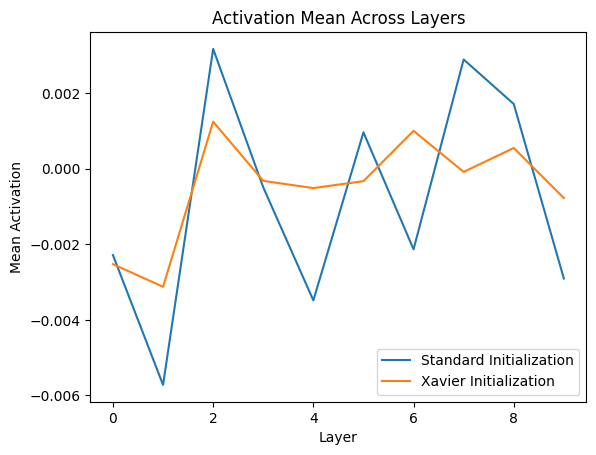

In [43]:
import matplotlib.pyplot as plt

def simulate(initialization):
    torch.manual_seed(0)
    activations = []
    x = torch.randn(1000, 100)  
    for layer in range(10):
        if initialization == 'standard':
            w = torch.randn(100, 100)  
        elif initialization == 'xavier':
            w = torch.randn(100, 100) * (1.0 / torch.sqrt(torch.tensor(100.0)))
        x = torch.tanh(x @ w)
        activations.append(x.mean().item())
    return activations

standard_activations = simulate('standard')
xavier_activations = simulate('xavier')

plt.plot(standard_activations, label='Standard Initialization')
plt.plot(xavier_activations, label='Xavier Initialization')
plt.xlabel('Layer')
plt.ylabel('Mean Activation')
plt.legend()
plt.title('Activation Mean Across Layers')
plt.show()


### Operations

Most operations that exist in numpy, also exist in PyTorch. A full list of operations can be found in the [PyTorch documentation](https://pytorch.org/docs/stable/tensors.html#), but we will review the most important ones here.

The simplest operation is to add two tensors:

In [44]:
x1 = torch.ones(2, 3)
x2 = torch.ones(2, 3)
y = x1 + x2

print("X1", x1)
print("X2", x2)
print("Y", y)

X1 tensor([[1., 1., 1.],
        [1., 1., 1.]])
X2 tensor([[1., 1., 1.],
        [1., 1., 1.]])
Y tensor([[2., 2., 2.],
        [2., 2., 2.]])


Calling `x1 + x2` creates a new tensor containing the sum of the two inputs. However, we can also use in-place operations that are applied directly on the memory of a tensor. We therefore change the values of `x2` without the chance to re-accessing the values of `x2` before the operation. An example is shown below:

In [45]:
x1 = torch.ones(2, 3)
x2 = torch.ones(2, 3)
print("X1 (before)", x1)
print("X2 (before)", x2)

x2.add_(x1)
print("X1 (after)", x1)
print("X2 (after)", x2)

X1 (before) tensor([[1., 1., 1.],
        [1., 1., 1.]])
X2 (before) tensor([[1., 1., 1.],
        [1., 1., 1.]])
X1 (after) tensor([[1., 1., 1.],
        [1., 1., 1.]])
X2 (after) tensor([[2., 2., 2.],
        [2., 2., 2.]])


In-place operations are usually marked with a underscore postfix (e.g. "add_" instead of "add").

Another common operation aims at changing the shape of a tensor. A tensor of size (2,3) can be re-organized to any other shape with the same number of elements (e.g. a tensor of size (6), or (3,2), ...). In PyTorch, this operation is called `view`:

### view()


The `view()` function reshapes a tensor without changing its data. The tensor must be **contiguous** in memory. It's similar to NumPy's `reshape()` but has specific memory layout requirements.

**Syntax:**

```python
tensor.view(*shape)
```

- **shape**: The desired shape of the output tensor.

In [55]:
tensor = torch.arange(6)
reshaped = tensor.view(2, 3)
print(reshaped)

tensor([[0, 1, 2],
        [3, 4, 5]])


**Using -1 to Automatically Infer a Dimension**


In [56]:
tensor = torch.arange(12)
reshaped = tensor.view(3, -1)
print(reshaped)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


**Flattening a Multi-Dimensional Tensor**


In [57]:
tensor = torch.randn(2, 3, 4)
flattened = tensor.view(-1)
print(flattened.shape)

torch.Size([24])


**Operating on Non-Contiguous Tensors**

In [ ]:
tensor = torch.randn(2, 3)
transposed = tensor.t()
   # Pitfall: transposed tensor is non-contiguous
try:
    reshaped = transposed.view(6)
except RuntimeError as e:
    print(e)
   # Correct Approach


view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.


In [60]:
reshaped = transposed.contiguous().view(6)
print(reshaped)

tensor([-0.0275,  1.7374,  0.8719,  0.0793, -0.9430, -0.8977])


In [ ]:
try:
    tensor = torch.arange(8)
    reshaped = tensor.view(-1, -1)
except RuntimeError as e:
    print(e)
reshaped = tensor.view(2, -1)

only one dimension can be inferred


### reshape()

#### Deep Explanation

`reshape()` returns a tensor with the same data and number of elements as the input but with a specified shape. It can handle non-contiguous tensors by making a copy if necessary.

**Syntax:**

```python
tensor.reshape(*shape)
```

**Reshaping a Tensor Similar to view()**

In [ ]:
tensor = torch.arange(6)
reshaped = tensor.reshape(2, 3)
print(reshaped)

tensor([[0, 1, 2],
        [3, 4, 5]])


**Reshaping Non-Contiguous Tensors**

In [ ]:
tensor = torch.randn(2, 3)
transposed = tensor.t()
reshaped = transposed.reshape(6)
print(reshaped.shape)


torch.Size([6])


**Using -1 for Dynamic Reshaping**


In [177]:
tensor = torch.arange(24)
reshaped = tensor.reshape(-1, 6, 4)
print(reshaped.shape)

torch.Size([1, 6, 4])


### permute()

`permute()` rearranges the dimensions of a tensor according to a specified ordering. It returns a view of the original tensor with its dimensions permuted.

**Syntax:**

```python
tensor.permute(*dims)
```

- **dims**: The desired ordering of dimensions.

 **Swapping Dimensions in a Tensor**

In [66]:
tensor = torch.randn(2, 3, 4)
permuted = tensor.permute(2, 0, 1)
print(permuted.shape)

torch.Size([4, 2, 3])


**Reversing Dimensions**

In [67]:
tensor = torch.randn(2, 3, 4)
permuted = tensor.permute(2, 1, 0)
print(permuted.shape)

torch.Size([4, 3, 2])


**Transposing a 2D Tensor**

In [68]:
tensor = torch.randn(2, 3)
permuted = tensor.permute(1, 0)
print(permuted.shape)

torch.Size([3, 2])



### squeeze() and unsqueeze()


- **squeeze()**: Removes dimensions of size 1 from a tensor.
- **unsqueeze()**: Inserts a dimension of size 1 at the specified position.

**Syntax:**

```python
tensor.squeeze(dim=None)
tensor.unsqueeze(dim)
```

**Removing All Singleton Dimensions**

In [69]:
tensor = torch.randn(1, 3, 1, 5)
squeezed = tensor.squeeze()
print(squeezed.shape)

torch.Size([3, 5])


**Removing a Specific Dimension**

In [70]:
tensor = torch.randn(1, 3, 1, 5)
squeezed = tensor.squeeze(dim=2)
print(squeezed.shape)

torch.Size([1, 3, 5])


**Adding a Dimension**

In [71]:
tensor = torch.randn(3, 5)
unsqueezed = tensor.unsqueeze(dim=0)
print(unsqueezed.shape)

torch.Size([1, 3, 5])


Some commonly used operations include matrix multiplications, which are essential for neural networks. Quite often, we have an input vector $\mathbf{x}$, which is transformed using a learned weight matrix $\mathbf{W}$. There are multiple ways and functions to perform matrix multiplication, some of which we list below:


* `torch.mm`: Performs the matrix product over two matrices, but doesn't support broadcasting (see [documentation](https://pytorch.org/docs/stable/generated/torch.mm.html?highlight=torch%20mm#torch.mm))

* `torch.matmul`: Performs the matrix product over two tensors, where the specific behavior depends on the dimensions. If both inputs are matrices (2-dimensional tensors), it performs the standard matrix product. For higher dimensional inputs, the function supports broadcasting (for details see the [documentation](https://pytorch.org/docs/stable/generated/torch.matmul.html?highlight=matmul#torch.matmul)). Can also be written as `a @ b`, similar to numpy. 

* `torch.bmm`: Performs the matrix product with a support batch dimension. If the first tensor $T$ is of shape ($b\times n\times m$), and the second tensor $R$ ($b\times m\times p$), the output $O$ is of shape ($b\times n\times p$), and has been calculated by performing $b$ matrix multiplications of the submatrices of $T$ and $R$: $O_i = T_i @ R_i$
* `torch.einsum`: Performs matrix multiplications and more (i.e. sums of products) using the Einstein summation convention. Explanation of the Einstein sum can be found in assignment 1.

Usually, we use `torch.matmul` or `torch.bmm`. We can try a matrix multiplication with `torch.matmul` below.

`torch.mm()` performs matrix multiplication between two 2D tensors. The matrices must be compatible in dimensions.

**Syntax:**

```python
torch.mm(mat1, mat2)
```

- **mat1**: Tensor of shape `(n, m)`
- **mat2**: Tensor of shape `(m, p)`

In [72]:
a = torch.randn(2, 3)
b = torch.randn(3, 4)
result = torch.mm(a, b)
print(result.shape)


torch.Size([2, 4])


### Pitfall
**Using mm() with Higher-Rank Tensors**

mm() does not support tensors with rank > 2


In [ ]:
a = torch.randn(2, 3, 4)
b = torch.randn(4, 5)
try:
    result = torch.mm(a, b)
except RuntimeError as e:
    print(e)
   # Correct Approach


self must be a matrix


#### Solution

In [78]:
a = torch.ones(2, 2, 3)
b = torch.ones(3, 2)
h = torch.matmul(a, b) 
print("h", h)

h tensor([[[3., 3.],
         [3., 3.]],

        [[3., 3.],
         [3., 3.]]])


### bmm()



`torch.bmm()` performs batch matrix multiplication on 3D tensors. It multiplies matrices in batches.

**Syntax:**

```python
torch.bmm(batch1, batch2)
```

- **batch1**: Tensor of shape `(b, n, m)`
- **batch2**: Tensor of shape `(b, m, p)`

In [79]:
batch1 = torch.randn(10, 2, 3)
batch2 = torch.randn(10, 3, 4)
result = torch.bmm(batch1, batch2)
print(result.shape)

torch.Size([10, 2, 4])


In [82]:
batch1 = torch.randn(10, 2, 3)
batch2 = torch.randn(3, 4)
result = torch.bmm(batch1, batch2)
print(result.shape)

RuntimeError: batch2 must be a 3D tensor

### The `@` Operator


The `@` operator performs matrix multiplication and supports broadcasting. It's equivalent to `torch.matmul()` and can handle inputs of varying dimensions.

**Syntax:**

```python
result = tensor1 @ tensor2
```

In [83]:
a = torch.randn(2, 3)
b = torch.randn(3, 4)
result = a @ b
print(result.shape)

torch.Size([2, 4])


In [84]:
a = torch.randn(10, 2, 3)
b = torch.randn(3, 4)
result = a @ b
print(result.shape)

torch.Size([10, 2, 4])


In [85]:
a = torch.randn(5, 7, 2, 3)
b = torch.randn(5, 7, 3, 4)
result = a @ b
print(result.shape)

torch.Size([5, 7, 2, 4])


### einsum()

#### Dot Product of Vectors

In [92]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])
dot = torch.einsum('i,i->', a, b)
print(dot)

tensor(32)


#### Outer Product of Vectors

In [94]:
outer = torch.einsum('i,j->ij', a, b)
print(outer)

tensor([[ 4,  5,  6],
        [ 8, 10, 12],
        [12, 15, 18]])


#### Matrix Multiplication

In [100]:
A = torch.ones(2, 3)
B = torch.ones(3, 4)
result = torch.einsum('ik,kj->ij', A, B)
print(result)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.]])


#### Matrix Transpose

In [ ]:
A_T = torch.einsum('ij->ji', A)
print(A)
print(A_T)


tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])


#### Trace of a Matrix

In [179]:
A1 = torch.ones(4, 4)

trace = torch.einsum('ii->', A1)
print(trace)

tensor(4.)


#### Batch Matrix Multiplication

In [107]:
batch1 = torch.ones(4, 2, 3)
batch2 = torch.ones(4, 3, 4)
result = torch.einsum('bij,bjk->bik', batch1, batch2)
print(result)

tensor([[[3., 3., 3., 3.],
         [3., 3., 3., 3.]],

        [[3., 3., 3., 3.],
         [3., 3., 3., 3.]],

        [[3., 3., 3., 3.],
         [3., 3., 3., 3.]],

        [[3., 3., 3., 3.],
         [3., 3., 3., 3.]]])


#### Element-wise Multiplication

In [109]:
A2 = torch.ones(2,3)
B2 = torch.ones(2,3)

result = torch.einsum('ij,ij->ij', A2, B2)
print(result)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


#### Tensor Permutation (Swapping Axes)

In [112]:
T = torch.ones(2, 3, 4)
swapped = torch.einsum('ijk->ikj', T)
print((swapped.size()))

torch.Size([2, 4, 3])


## Autograd
Pytorch is well-known for its automatic differentiation feature. We can call the `backward()` method to ask `PyTorch` to calculate the gradients, which are then stored in the `grad` attribute.

In [180]:
import pprint
pp = pprint.PrettyPrinter()
x = torch.tensor([2.], requires_grad=True)
pp.pprint(x.grad)

None


In [181]:
y = x * x * 3 # 3x^2
y.backward()
pp.pprint(x.grad) # d(y)/d(x) = d(3x^2)/d(x) = 6x = 12

tensor([12.])


In [184]:
z = x * x * 3 # 3x^2
z.backward()
pp.pprint(x.grad)

tensor([48.])


In [ ]:
z = x * x * 3 # 3x^2
z.backward()
pp.pprint(x.grad)

tensor([36.])


### Computational Graph

In order to get familiar with the concept of a computation graph, we will create one for the following function:

$$y = \frac{1}{\ell(x)}\sum_i \left[(x_i + 2)^2 + 3\right],$$

where we use $\ell(x)$ to denote the number of elements in $x$. In other words, we are taking a mean here over the operation within the sum. You could imagine that $x$ are our parameters, and we want to optimize (either maximize or minimize) the output $y$. For this, we want to obtain the gradients $\partial y / \partial \mathbf{x}$. For our example, we'll use $\mathbf{x}=[0,1,2]$ as our input.

In [ ]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True) 
print("X", x)

X tensor([0., 1., 2.], requires_grad=True)


Lets begin with building the computation graph

In [114]:
a = x + 2
b = a ** 2
c = b + 3
y = c.mean()
print("Y", y)

Y tensor(12.6667, grad_fn=<MeanBackward0>)


In [ ]:
from torchviz import make_dot
graph = make_dot(y, params=dict(x=x))
graph.render('output_graph', format='png', cleanup=True)  # Saves as 'output_graph.png'


'output_graph.png'


We calculate $a$ based on the inputs $x$ and the constant $2$, $b$ is $a$ squared, and so on. The visualization is an abstraction of the dependencies between inputs and outputs of the operations we have applied.
Each node of the computation graph has automatically defined a function for calculating the gradients with respect to its inputs, `grad_fn`. You can see this when we printed the output tensor $y$. This is why the computation graph is usually visualized in the reverse direction (arrows point from the result to the inputs). We can perform backpropagation on the computation graph by calling the function `backward()` on the last output, which effectively calculates the gradients for each tensor that has the property `requires_grad=True`:

In [127]:
y.backward()

In [128]:
print(x.grad)

tensor([1.3333, 2.0000, 2.6667])


We can also verify these gradients by hand. We will calculate the gradients using the chain rule, in the same way as PyTorch did it:

$$\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial c_i}\frac{\partial c_i}{\partial b_i}\frac{\partial b_i}{\partial a_i}\frac{\partial a_i}{\partial x_i}$$

Note that we have simplified this equation to index notation, and by using the fact that all operation besides the mean do not combine the elements in the tensor. The partial derivatives are:

$$
\frac{\partial a_i}{\partial x_i} = 1,\hspace{1cm}
\frac{\partial b_i}{\partial a_i} = 2\cdot a_i\hspace{1cm}
\frac{\partial c_i}{\partial b_i} = 1\hspace{1cm}
\frac{\partial y}{\partial c_i} = \frac{1}{3}
$$

Hence, with the input being $\mathbf{x}=[0,1,2]$, our gradients are $\partial y/\partial \mathbf{x}=[4/3,2,8/3]$. The previous code cell should have printed the same result.

---

## Using `torch.nn.functional` as F

The `torch.nn.functional` module contains functions for building neural networks, such as activation functions, loss functions, and convolution operations. Importing it as `F` is a common practice for brevity.


```python
import torch.nn.functional as F
```


1. **Using Activation Functions**

   ```python
   import torch.nn.functional as F

   x = torch.randn(10)
   y = F.relu(x)
   ```

2. **Applying Loss Functions**

   ```python
   import torch.nn.functional as F

   outputs = model(inputs)
   loss = F.cross_entropy(outputs, targets)
   ```

---

## Saving Models, Loss Functions, and Optimizers

#### Deep Explanation

- **Saving Models**: Use `torch.save()` to save model state dictionaries and `torch.load()` to load them.
- **Loss Functions**: Define the criterion for training, e.g., `nn.CrossEntropyLoss()`.
- **Optimizers**: Update model parameters using algorithms like SGD or Adam.

#### Code Snippets with Correct Variations

1. **Saving and Loading Model State**

   ```python
   # Define model and optimizer
   model = MyModel()
   optimizer = torch.optim.Adam(model.parameters())

   # Training loop
   # ...

   # Saving checkpoint
   torch.save({
       'epoch': epoch,
       'model_state_dict': model.state_dict(),
       'optimizer_state_dict': optimizer.state_dict(),
       'loss': loss,
       }, 'checkpoint.pth')

   # Loading checkpoint
   checkpoint = torch.load('checkpoint.pth')
   model.load_state_dict(checkpoint['model_state_dict'])
   optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
   ```

2. **Defining Loss Functions**

   ```python
   criterion = torch.nn.CrossEntropyLoss()
   outputs = model(inputs)
   loss = criterion(outputs, targets)
   ```

3. **Setting Up Optimizers**

   ```python
   optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

   # Training loop
   for data in dataloader:
       optimizer.zero_grad()
       outputs = model(data)
       loss = criterion(outputs, targets)
       loss.backward()
       optimizer.step()
   ```


The very first task of any machine learning project is to set up our training set.

#### Our task is NER (Named Entity Recognition) using Word Window Classification

#### Preprocessing

To make it easier for our models to learn, we usually apply a few preprocessing steps to our data. This is especially important when dealing with text data. Here are some examples of text preprocessing:
* **Tokenization**: Tokenizing the sentences into words.
* **Lowercasing**: Changing all the letters to be lowercase.
* **Noise removal:** Removing special characters (such as punctuations).
* **Stop words removal**: Removing commonly used words.

Which preprocessing steps are necessary is determined by the task at hand. For example, although it is useful to remove special characters in some tasks, for others they may be important (for example, if we are dealing with multiple languages). For our task, we will lowercase our words and tokenize.

In [132]:
# Our raw data, which consists of sentences
corpus = [
          "We always come to Paris",
          "The professor is from Australia",
          "I live in Kaiserslautern",
          "He comes from Taiwan",
          "The capital of Turkey is Ankara"
         ]
# The preprocessing function we will use to generate our training examples
# Our function is a simple one, we lowercase the letters
# and then tokenize the words.
def preprocess_sentence(sentence):
  return sentence.lower().split()

# Create our training set
train_sentences = [preprocess_sentence(sent) for sent in corpus]
train_sentences

[['we', 'always', 'come', 'to', 'paris'],
 ['the', 'professor', 'is', 'from', 'australia'],
 ['i', 'live', 'in', 'kaiserslautern'],
 ['he', 'comes', 'from', 'taiwan'],
 ['the', 'capital', 'of', 'turkey', 'is', 'ankara']]

In [ ]:
# Set of locations that appear in our corpus
locations = set(["australia", "ankara", "paris", "kaiserslautern", "taiwan", "turkey"])

# Our training labels
train_labels = [[1 if word in locations else 0 for word in sent] for sent in train_sentences]
train_labels

[[0, 0, 0, 0, 1],
 [0, 0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1, 0, 1]]

#### Converting Words to Embeddings

Let's look at our training data a little more closely. Each datapoint we have is a sequence of words. On the other hand, we know that machine learning models work with numbers in vectors. How are we going to turn words into numbers? 



Imagine that we have an embedding lookup table `E`, where each row corresponds to an embedding. That is, each word in our vocabulary would have a corresponding embedding row `i` in this table. Whenever we want to find an embedding for a word, we will follow these steps:
1. Find the corresponding index `i` of the word in the embedding table: `word->index`.
2. Index into the embedding table and get the embedding: `index->embedding`.

Let's look at the first step. We should assign all the words in our vocabulary to a corresponding index. We can do it as follows:
1. Find all the unique words in our corpus.
2. Assign an index to each.

In [135]:
# Find all the unique words in our corpus
vocabulary = set(w for s in train_sentences for w in s)
vocabulary

{'always',
 'ankara',
 'australia',
 'capital',
 'come',
 'comes',
 'from',
 'he',
 'i',
 'in',
 'is',
 'kaiserslautern',
 'live',
 'of',
 'paris',
 'professor',
 'taiwan',
 'the',
 'to',
 'turkey',
 'we'}

`vocabulary` now contains all the words in our corpus. On the other hand, during the test time, we can see words that are not contained in our vocabulary. If we can figure out a way to represent the unknown words, our model can still reason about whether they are a `LOCATION` or not, since we are also looking at the neighboring words for each prediction.

We introduce a special token, `<unk>`, to tackle the words that are out of vocabulary. We could pick another string for our unknown token if we wanted. The only requirement here is that our token should be unique: we should only be using this token for unknown words. We will also add this special token to our vocabulary.

In [136]:
# Add the unknown token to our vocabulary
vocabulary.add("<unk>")

Earlier we mentioned that our task was called `Word Window Classification` because our model is looking at the surroundings words in addition to the given word when it needs to make a prediction.

For example, let's take the sentence "We always come to Paris". The corresponding training label for this sentence is `0, 0, 0, 0, 1` since only Paris, the last word, is a `LOCATION`. In one pass (meaning a call to `forward()`), our model will try to generate the correct label for one word. Let's say our model is trying to generate the correct label `1` for `Paris`. If we only allow our model to see `Paris`, but nothing else, we will miss out on the important information that the word `to` often times appears with `LOCATION`s.

Word windows allow our model to consider the surrounding `+N` or `-N` words of each word when making a prediction. In our earlier example for `Paris`, if we have a window size of 1, that means our model will look at the words that come immediately before and after `Paris`, which are `to`, and, well, nothing. Now, this raises another issue. `Paris` is at the end of our sentence, so there isn't another word following it. Remember that we define the input dimensions of our `PyTorch` models when we are initializing them. If we set the window size to be `1`, it means that our model will be accepting `3` words in every pass. We cannot have our model expect `2` words from time to time.

The solution is to introduce a special token, such as `<pad>`, that will be added to our sentences to make sure that every word has a valid window around them. Similar to `<unk>` token, we could pick another string for our pad token if we wanted, as long as we make sure it is used for a unique purpose.

In [ ]:
vocabulary.add("<pad>")

def pad_window(sentence, window_size, pad_token="<pad>"):
  window = [pad_token] * window_size
  return window + sentence + window

window_size = 2
pad_window(train_sentences[0], window_size=window_size)

['<pad>', '<pad>', 'we', 'always', 'come', 'to', 'paris', '<pad>', '<pad>']

In [ ]:
# We are just converting our vocabularly to a list to be able to index into it
# Sorting is not necessary, we sort to show an ordered word_to_ind dictionary
# That being said, we will see that having the index for the padding token
# be 0 is convenient as some PyTorch functions use it as a default value
# such as nn.utils.rnn.pad_sequence, which we will cover in a bit
ix_to_word = sorted(list(vocabulary))

# Creating a dictionary to find the index of a given word
word_to_ix = {word: ind for ind, word in enumerate(ix_to_word)}
word_to_ix

{'<pad>': 0,
 '<unk>': 1,
 'always': 2,
 'ankara': 3,
 'australia': 4,
 'capital': 5,
 'come': 6,
 'comes': 7,
 'from': 8,
 'he': 9,
 'i': 10,
 'in': 11,
 'is': 12,
 'kaiserslautern': 13,
 'live': 14,
 'of': 15,
 'paris': 16,
 'professor': 17,
 'taiwan': 18,
 'the': 19,
 'to': 20,
 'turkey': 21,
 'we': 22}

In [185]:
ix_to_word[1]

'<unk>'

In [186]:
def convert_token_to_indices(sentence, word_to_ix):
  indices = []
  for token in sentence:
    if token in word_to_ix:
      index = word_to_ix[token]
    else:
      index = word_to_ix["<unk>"]
    indices.append(index)
  return indices

def _convert_token_to_indices(sentence, word_to_ix):
  return [word_to_ind.get(token, word_to_ix["<unk>"]) for token in sentence]

example_sentence = ["we", "always", "come", "to", "kuwait"]
example_indices = convert_token_to_indices(example_sentence, word_to_ix)
restored_example = [ix_to_word[ind] for ind in example_indices]

print(f"Original sentence is: {example_sentence}")
print(f"Going from words to indices: {example_indices}")
print(f"Going from indices to words: {restored_example}")

Original sentence is: ['we', 'always', 'come', 'to', 'kuwait']
Going from words to indices: [22, 2, 6, 20, 1]
Going from indices to words: ['we', 'always', 'come', 'to', '<unk>']


In [187]:
# Converting our sentences to indices
example_padded_indices = [convert_token_to_indices(s, word_to_ix) for s in train_sentences]
example_padded_indices

[[22, 2, 6, 20, 16],
 [19, 17, 12, 8, 4],
 [10, 14, 11, 13],
 [9, 7, 8, 18],
 [19, 5, 15, 21, 12, 3]]

#### Batching Sentences

We have learned about batches in class. Waiting our whole training corpus to be processed before making an update is constly. On the other hand, updating the parameters after every training example causes the loss to be less stable between updates. To combat these issues, we instead update our parameters after training on a batch of data. This allows us to get a better estimate of the gradient of the global loss. In this section, we will learn how to structure our data into batches using the `torch.util.data.DataLoader` class.

We will be calling the `DataLoader` class as follows: `DataLoader(data, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)`.  The `batch_size` parameter determines the number of examples per batch. In every epoch, we will be iterating over all the batches using the `DataLoader`. The order of batches is deterministic by default, but we can ask `DataLoader` to shuffle the batches by setting the `shuffle` parameter to `True`. This way we ensure that we don't encounter a bad batch multiple times.

If provided, `DataLoader` passes the batches it prepares to the `collate_fn`. We can write a custom function to pass to the `collate_fn` parameter in order to print stats about our batch or perform extra processing. In our case, we will use the `collate_fn` to:
1. Window pad our train sentences.
2. Convert the words in the training examples to indices.
3. Pad the training examples so that all the sentences and labels have the same length. Similarly, we also need to pad the labels. This creates an issue because when calculating the loss, we need to know the actual number of words in a given example. We will also keep track of this number in the function we pass to the `collate_fn` parameter.

Because our version of the `collate_fn` function will need to access to our `word_to_ix` dictionary (so that it can turn words into indices), we will make use of the `partial` function in `Python`, which passes the parameters we give to the function we pass it.

This function seems long, but it really doesn't have to be. Check out the alternative version below where we remove the extra function declarations and comments.

In [143]:
def _custom_collate_fn(batch, window_size, word_to_ix):
  # Prepare the datapoints
  x, y = zip(*batch)
  x = [pad_window(s, window_size=window_size) for s in x]
  x = [convert_tokens_to_indices(s, word_to_ix) for s in x]

  # Pad x so that all the examples in the batch have the same size
  pad_token_ix = word_to_ix["<pad>"]
  x = [torch.LongTensor(x_i) for x_i in x]
  x_padded = nn.utils.rnn.pad_sequence(x, batch_first=True, padding_value=pad_token_ix)

  # Pad y and record the length
  lengths = [len(label) for label in y]
  lenghts = torch.LongTensor(lengths)
  y = [torch.LongTensor(y_i) for y_i in y]
  y_padded = nn.utils.rnn.pad_sequence(y, batch_first=True, padding_value=0)

  return x_padded, y_padded, lenghts

In [144]:
# Parameters to be passed to the DataLoader
data = list(zip(train_sentences, train_labels))
batch_size = 2
shuffle = True
window_size = 2
collate_fn = partial(custom_collate_fn, window_size=window_size, word_to_ix=word_to_ix)

# Instantiate the DataLoader
loader = DataLoader(data, batch_size=batch_size, shuffle=shuffle, collate_fn=collate_fn)

# Go through one loop
counter = 0
for batched_x, batched_y, batched_lengths in loader:
  print(f"Iteration {counter}")
  print("Batched Input:")
  print(batched_x)
  print("Batched Labels:")
  print(batched_y)
  print("Batched Lengths:")
  print(batched_lengths)
  print("")
  counter += 1

Iteration 0
Batched Input:
tensor([[ 0,  0, 19,  5, 15, 21, 12,  3,  0,  0],
        [ 0,  0, 22,  2,  6, 20, 16,  0,  0,  0]])
Batched Labels:
tensor([[0, 0, 0, 1, 0, 1],
        [0, 0, 0, 0, 1, 0]])
Batched Lengths:
tensor([6, 5])

Iteration 1
Batched Input:
tensor([[ 0,  0, 10, 14, 11, 13,  0,  0],
        [ 0,  0,  9,  7,  8, 18,  0,  0]])
Batched Labels:
tensor([[0, 0, 0, 1],
        [0, 0, 0, 1]])
Batched Lengths:
tensor([4, 4])

Iteration 2
Batched Input:
tensor([[ 0,  0, 19, 17, 12,  8,  4,  0,  0]])
Batched Labels:
tensor([[0, 0, 0, 0, 1]])
Batched Lengths:
tensor([5])



The batched input tensors you see above will be passed into our model. On the other hand, we started off saying that our model will be a window classifier. The way our input tensors are currently formatted, we have all the words in a sentence in one datapoint. When we pass this input to our model, it needs to create the windows for each word, make a prediction as to whether the center word is a `LOCATION` or not for each window, put the predictions together and return.

We could avoid this problem if we formatted our data by breaking it into windows beforehand. In this example, we will instead how our model take care of the formatting.

Given that our `window_size` is `N` we want our model to make a prediction on every `2N+1` tokens. That is, if we have an input with `9` tokens, and a `window_size` of `2`, we want our model to return `5` predictions. This makes sense because before we padded it with `2` tokens on each side, our input also had `5` tokens in it!

We can create these windows by using for loops, but there is a faster `PyTorch` alternative, which is the `unfold(dimension, size, step)` method. We can create the windows we need using this method as follows:

In [145]:
# Print the original tensor
print(f"Original Tensor: ")
print(batched_x)
print("")

# Create the 2 * 2 + 1 chunks
chunk = batched_x.unfold(1, window_size*2 + 1, 1)
print(f"Windows: ")
print(chunk)

Original Tensor: 
tensor([[ 0,  0, 19, 17, 12,  8,  4,  0,  0]])

Windows: 
tensor([[[ 0,  0, 19, 17, 12],
         [ 0, 19, 17, 12,  8],
         [19, 17, 12,  8,  4],
         [17, 12,  8,  4,  0],
         [12,  8,  4,  0,  0]]])


### My Implementation

In [168]:
from torch.nn.utils.rnn import pad_sequence

def simple_collate_fn(batch, window_size, word_to_ix):
    sentences, labels = zip(*batch)
   
    def pad_sentence(sentence, window_size):
        pad_token = "<pad>"
        padding = [pad_token] * window_size
        return padding + sentence + padding

    # Pad sentences and convert words to indices
    padded_sentences = []
    for sentence in sentences:
        padded = pad_sentence(sentence, window_size)
        indices = [word_to_ix.get(word, word_to_ix["<unk>"]) for word in padded]
        padded_sentences.append(torch.tensor(indices, dtype=torch.long))
    
    label_tensors = [torch.tensor(label, dtype=torch.long) for label in labels]
    
    pad_token_ix = word_to_ix["<pad>"]
    x_padded = pad_sequence(padded_sentences, batch_first=True, padding_value=pad_token_ix)
    y_padded = pad_sequence(label_tensors, batch_first=True, padding_value=0)
    
    # Record original lengths (useful if needed)
    lengths = torch.tensor([len(label) for label in labels], dtype=torch.long)
    
    return x_padded, y_padded, lengths


In [169]:
import torch
import torch.nn as nn

class WordWindowClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, window_size, hidden_dim, pad_idx=0):
        super(WordWindowClassifier, self).__init__()
        
        self.window_size = window_size
        
        self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)
        
        window_length = 2 * window_size + 1
        input_dim = window_length * embedding_dim
        
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.activation = nn.Tanh()
        
        self.fc2 = nn.Linear(hidden_dim, 1)
        self.output_activation = nn.Sigmoid()
    
    def forward(self, inputs):
        
        windows = inputs.unfold(dimension=1, size=2 * self.window_size + 1, step=1)
       
        embedded = self.embeddings(windows)
       
        batch_size, num_windows, window_length, embedding_dim = embedded.size()
        embedded = embedded.view(batch_size, num_windows, -1)
        
        x = self.activation(self.fc1(embedded))
        x = self.output_activation(self.fc2(x))
        
        x = x.squeeze(-1)
        
        return x


### Training

We are now ready to put everything together. Let's start with preparing our data and intializing our model. We can then intialize our optimizer and define our loss function. This time, instead of using one of the predefined loss function as we did before, we will define our own loss function.

Unlike our earlier example, this time instead of passing all of our training data to the model at once in each epoch, we will be utilizing batches. Hence, in each training epoch iteration, we also iterate over the batches.

In [170]:
import torch.optim as optim

# Hyperparameters
embedding_dim = 50
hidden_dim = 100
window_size = 2
vocab_size = len(word_to_ix)
pad_idx = word_to_ix["<pad>"]

# Initialize the model
model = WordWindowClassifier(vocab_size, embedding_dim, window_size, hidden_dim, pad_idx)

# Loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Prepare data (assuming `data` is a list of (sentence, label) pairs)
from torch.utils.data import DataLoader
from functools import partial

batch_size = 2
collate_fn = partial(simple_collate_fn, window_size=window_size, word_to_ix=word_to_ix)
loader = DataLoader(data, batch_size=batch_size, collate_fn=collate_fn)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    total_loss = 0
    for x_batch, y_batch, lengths in loader:
        optimizer.zero_grad()
        outputs = model(x_batch)
        
        # Flatten outputs and labels
        outputs_flat = outputs.view(-1)
        y_batch_flat = y_batch.view(-1).float()
        
        # Compute loss (excluding padding positions)
        loss = criterion(outputs_flat, y_batch_flat)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    print(f'Epoch {epoch+1}, Loss: {total_loss / len(loader)}')


Epoch 1, Loss: 0.7117013533910116
Epoch 2, Loss: 0.5426270564397176
Epoch 3, Loss: 0.42606528600056964
Epoch 4, Loss: 0.33301909764607746
Epoch 5, Loss: 0.25858483215173084


In [171]:
# Create test sentences
test_corpus = ["She comes from Paris"]
test_sentences = [s.lower().split() for s in test_corpus]
test_labels = [[0, 0, 0, 1]]

# Create a test loader
test_data = list(zip(test_sentences, test_labels))
batch_size = 1
shuffle = False
window_size = 2
collate_fn = partial(custom_collate_fn, window_size=2, word_to_ix=word_to_ix)
test_loader = torch.utils.data.DataLoader(test_data,
                                           batch_size=1,
                                           shuffle=False,
                                           collate_fn=collate_fn)

In [172]:
for test_instance, labels, _ in test_loader:
  outputs = model.forward(test_instance)
  print(labels)
  print(outputs)

tensor([[0, 0, 0, 1]])
tensor([[0.1960, 0.2498, 0.2757, 0.8631]], grad_fn=<SqueezeBackward1>)
